<a href="https://colab.research.google.com/github/HimDahiya/INSE-6220-project/blob/main/INSE_6220_DateFruit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
# install slim version (default): if you get an error message, run it again
!pip install pycaret==2.3.6

  Using cached pycaret-2.3.6-py3-none-any.whl (301 kB)
  Using cached scipy-1.5.4.tar.gz (25.2 MB)
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [14]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (12,8)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from scipy.stats import beta
from scipy.stats import f

from itertools import cycle

# Machine Learning Modules
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [15]:
datefruit = pd.read_csv('/content/fruits.csv')

In [16]:
datefruit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PERIMETER     226 non-null    float64
 1   MAJOR_AXIS    226 non-null    float64
 2   MINOR_AXIS    226 non-null    float64
 3   ECCENTRICITY  226 non-null    float64
 4   EQDIASQ       226 non-null    float64
 5   SOLIDITY      226 non-null    float64
 6   CONVEX_AREA   226 non-null    int64  
 7   Class         226 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 14.2 KB


In [17]:
X = datefruit.iloc[:,0:7]
X.head(10)

,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA
0,1427.5811,515.6693,354.6234,0.7260,427.2253,0.9865,145320
1,1671.4170,615.8516,403.3667,0.7557,497.3849,0.9870,196863
2,1503.5980,546.4366,361.8018,0.7494,443.1601,0.9883,156070
3,1463.5551,544.9724,361.5594,0.7482,443.4745,0.9944,155339
4,1403.3560,542.0650,326.1642,0.7987,419.5720,0.9935,139162
5,1467.7220,573.7374,333.2054,0.8141,436.7935,0.9918,151080
6,1569.0680,587.9650,367.5672,0.7805,464.0740,0.9923,170461
7,1530.7870,564.7152,362.0923,0.7674,451.0723,0.9920,161095
8,1487.1000,534.5702,393.8198,0.6762,457.7480,0.9923,165851
9,1426.8580,535.9053,345.1051,0.7651,429.6369,0.9922,146121


In [18]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PERIMETER,226.0,2014.929916,471.784851,1039.9240,1490.169425,2218.76550,2404.347500,2722.6831
MAJOR_AXIS,226.0,738.401882,169.105237,372.3486,561.871275,805.67950,876.810050,1036.5886
MINOR_AXIS,226.0,469.617240,110.372510,270.6614,358.065075,487.85380,560.343200,679.2316
ECCENTRICITY,226.0,0.758741,0.072622,0.5259,0.710825,0.76635,0.814075,0.9035
EQDIASQ,226.0,584.559966,127.802238,288.9840,443.852850,639.16520,686.997175,779.2183
SOLIDITY,226.0,0.980496,0.015470,0.8366,0.976450,0.98455,0.989450,0.9947
CONVEX_AREA,226.0,287273.765487,114382.176842,78398.0000,156443.000000,328771.00000,379292.000000,483065.0000


In [19]:
X_st = StandardScaler().fit_transform(X)
df = pd.DataFrame(X_st)
df.columns = X.columns

Data Visualisation

In [20]:
y = datefruit['Class']
target = datefruit['Class'].to_numpy()

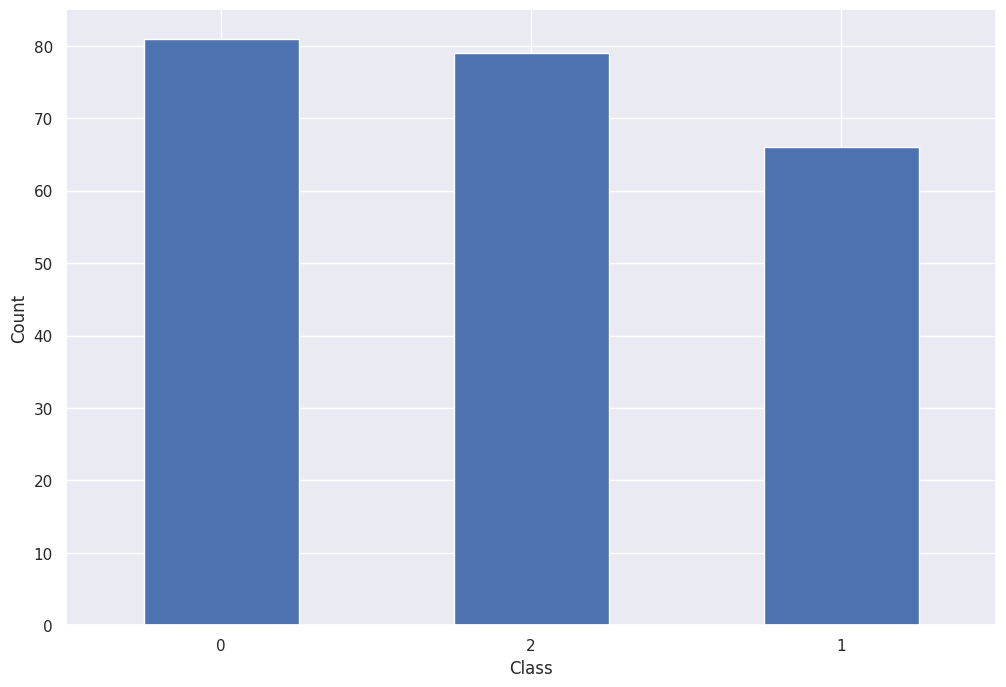

In [21]:
y.value_counts().plot(kind='bar', rot=0)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

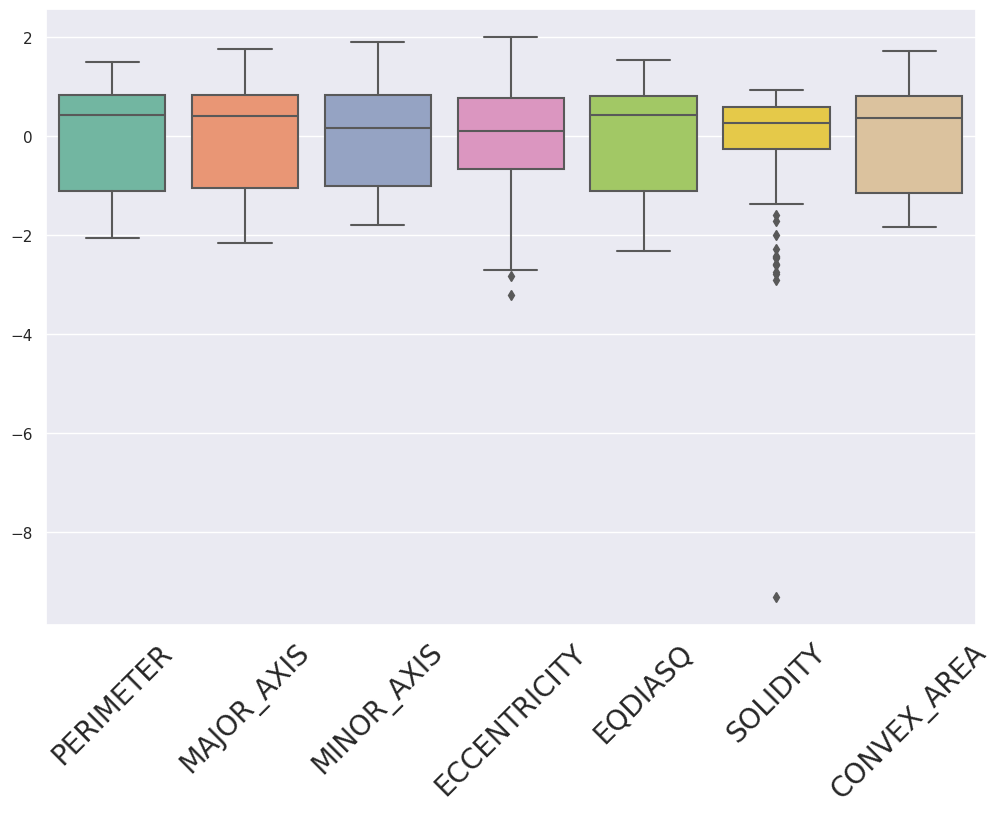

In [22]:
ax = plt.figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, size=20);

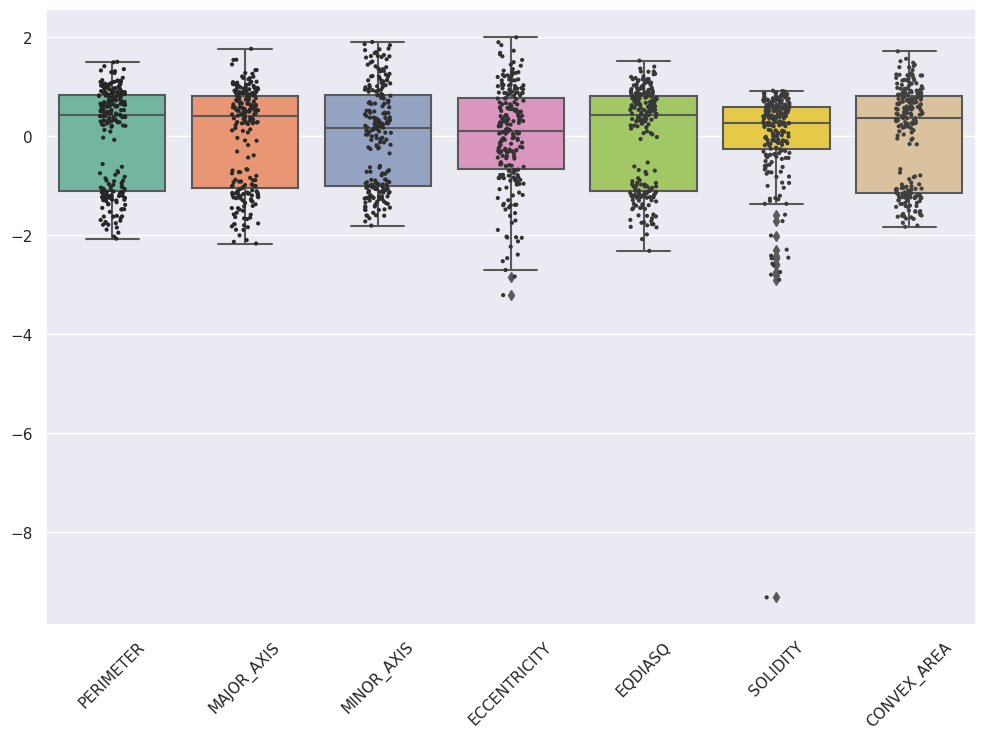

In [23]:
ax = plt.figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.stripplot(data=df, color=".25", size = 3)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

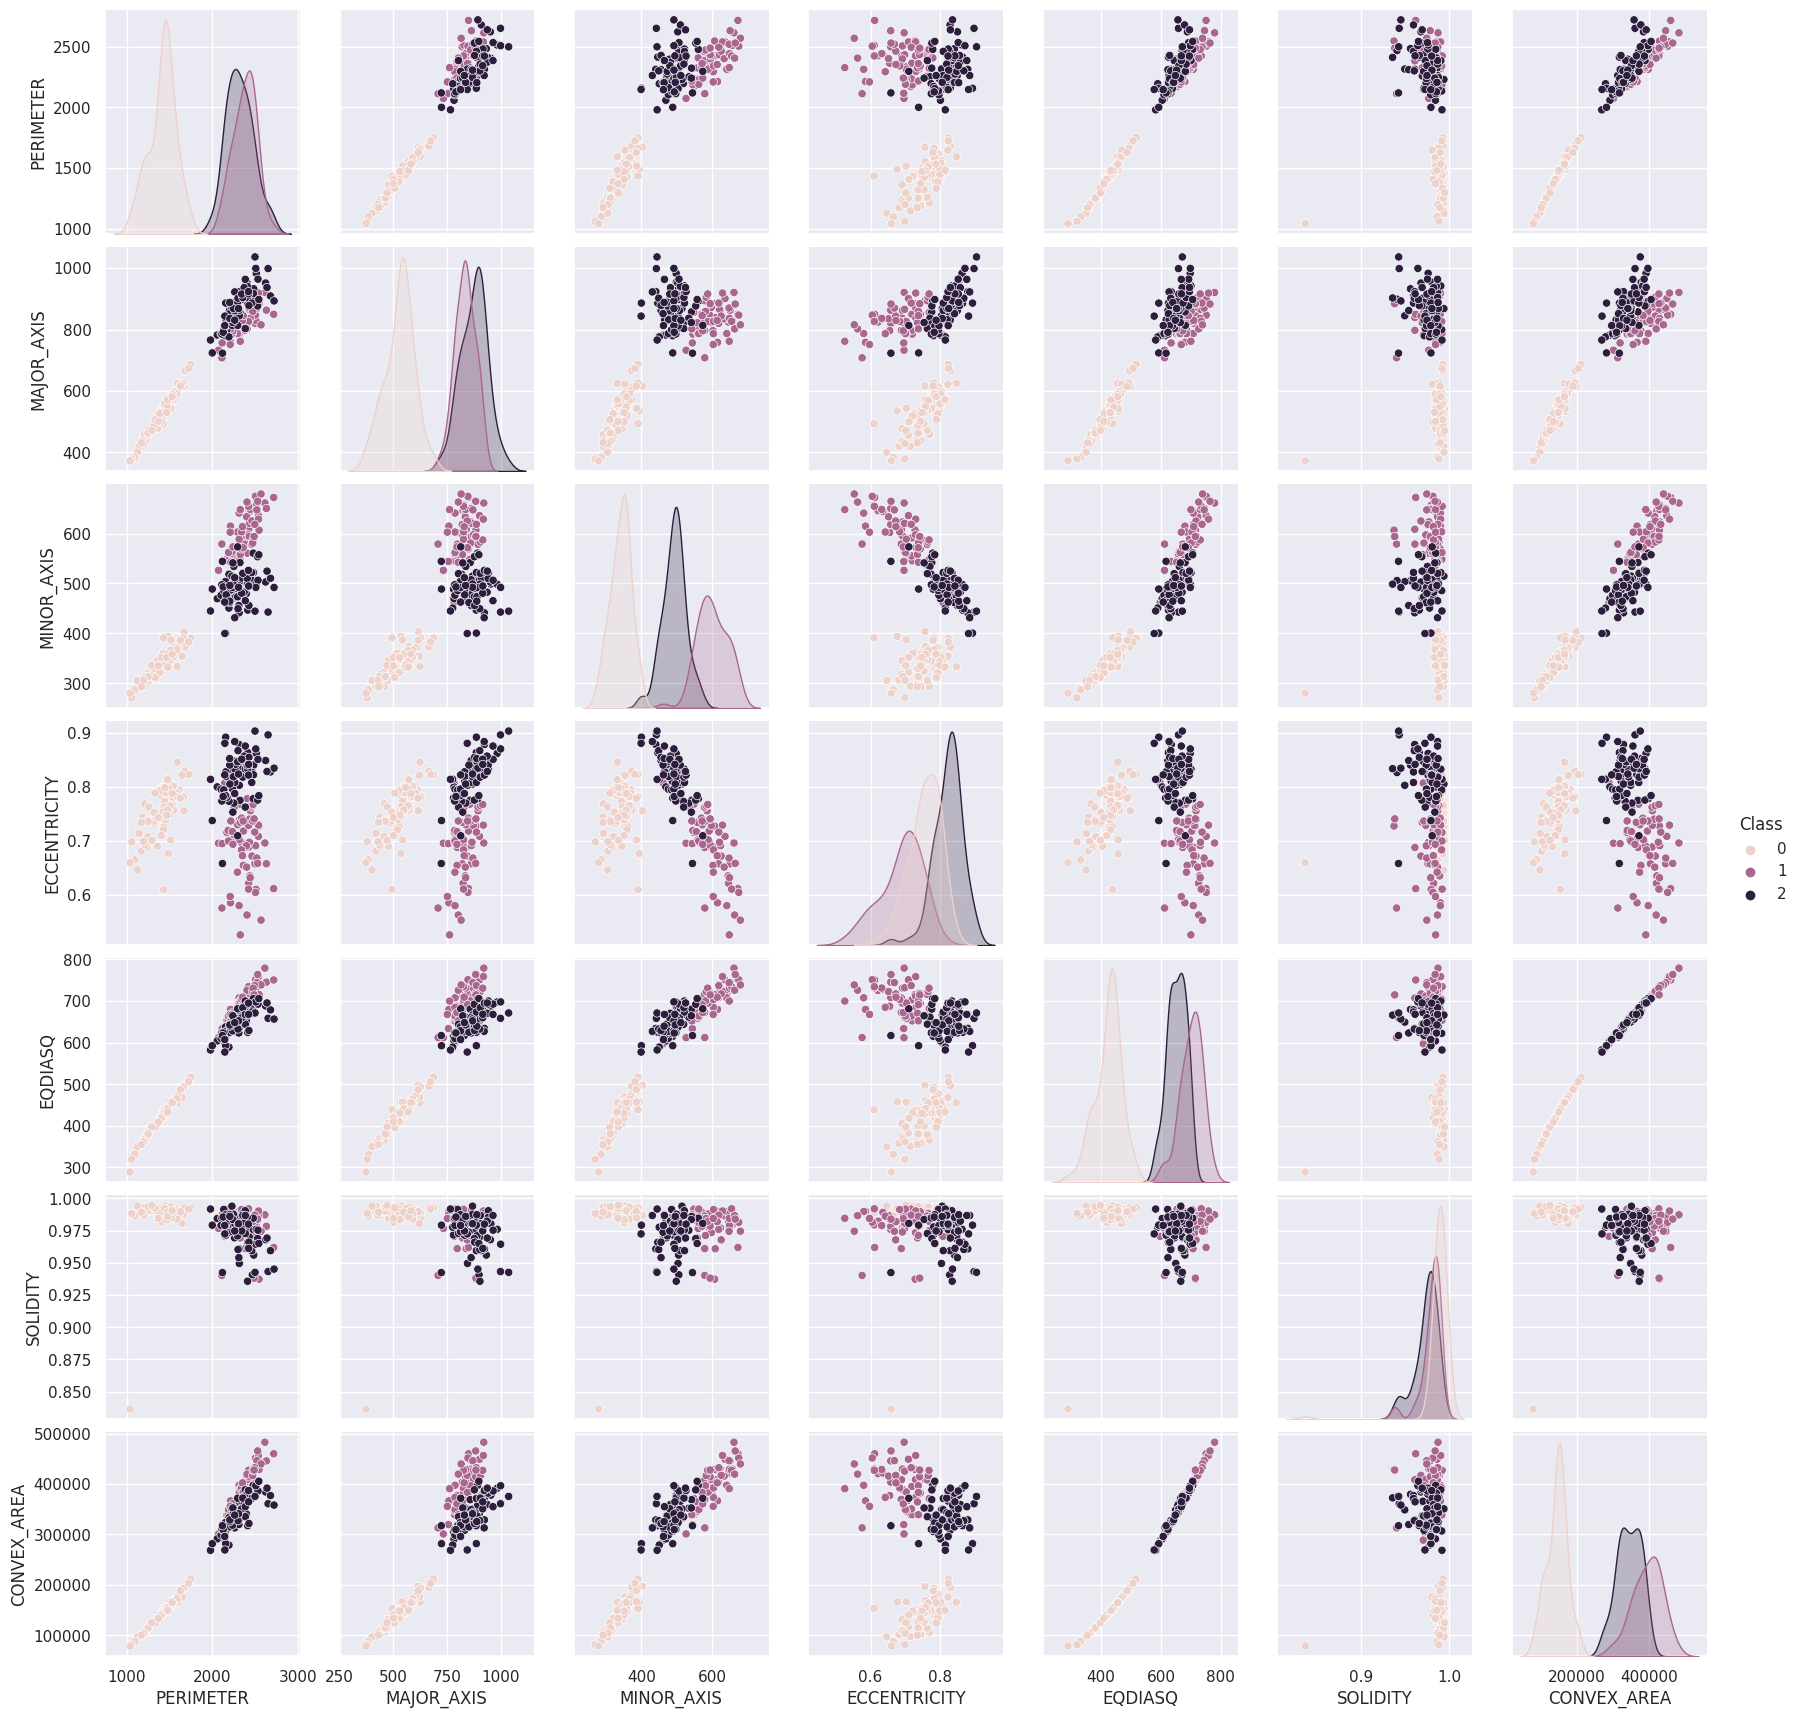

In [24]:
sns.pairplot(datefruit, hue='Class')
plt.show()

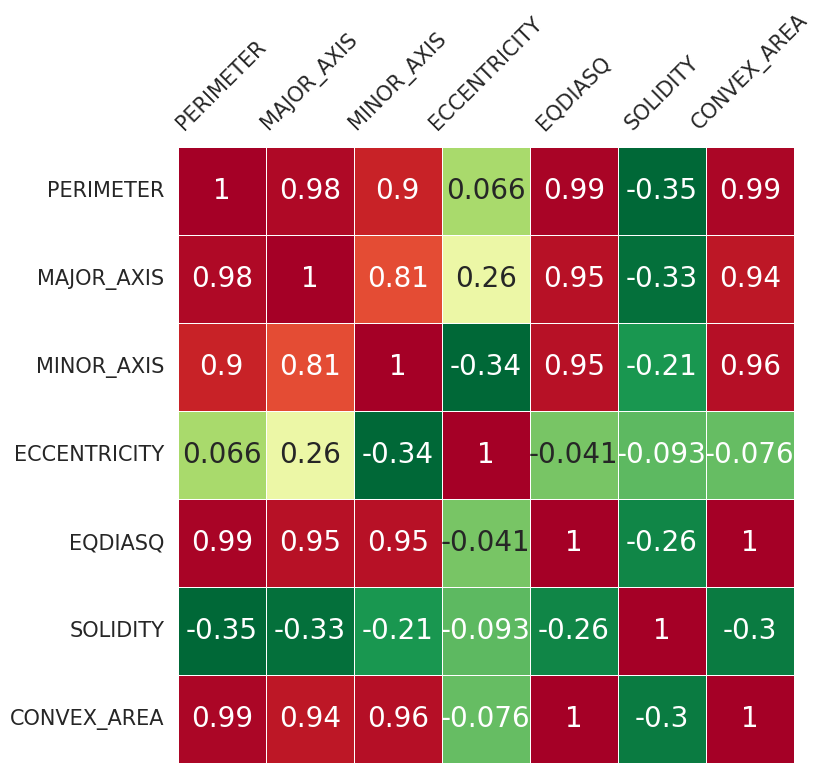

In [25]:
dfc = df - df.mean() #centered data
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True,
            cbar=False, square=True, annot_kws=dict(size=20))
plt.yticks(rotation=0, size=15)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, size=15);
#plt.title('Covariance matrix')

Z:
[[ 2.74720927e+00  4.57002917e-01  2.37382996e-01 ...  9.88548795e-03
   1.75729252e-02 -1.17784061e-02]
 [ 1.62921834e+00  1.33860104e-01 -1.21592517e-01 ...  3.95697449e-02
   8.14836794e-02 -1.06128398e-02]
 [ 2.49214183e+00  1.99641204e-01 -3.05159866e-02 ...  5.55239671e-02
   3.29490364e-02  1.35385371e-04]
 ...
 [-1.73735602e+00 -1.56449356e+00  4.70327557e-01 ... -2.11935805e-02
  -2.30796504e-02 -3.71560743e-03]
 [-1.86168397e+00 -8.16859410e-01 -5.99222732e-01 ... -6.57446766e-02
  -5.05240518e-02 -7.96342076e-03]
 [-2.23046485e+00 -1.18693834e+00 -2.24546985e-02 ...  1.66044868e-01
  -6.22209692e-02  1.35125393e-02]]


Text(0, 0.5, '$Z_2$')

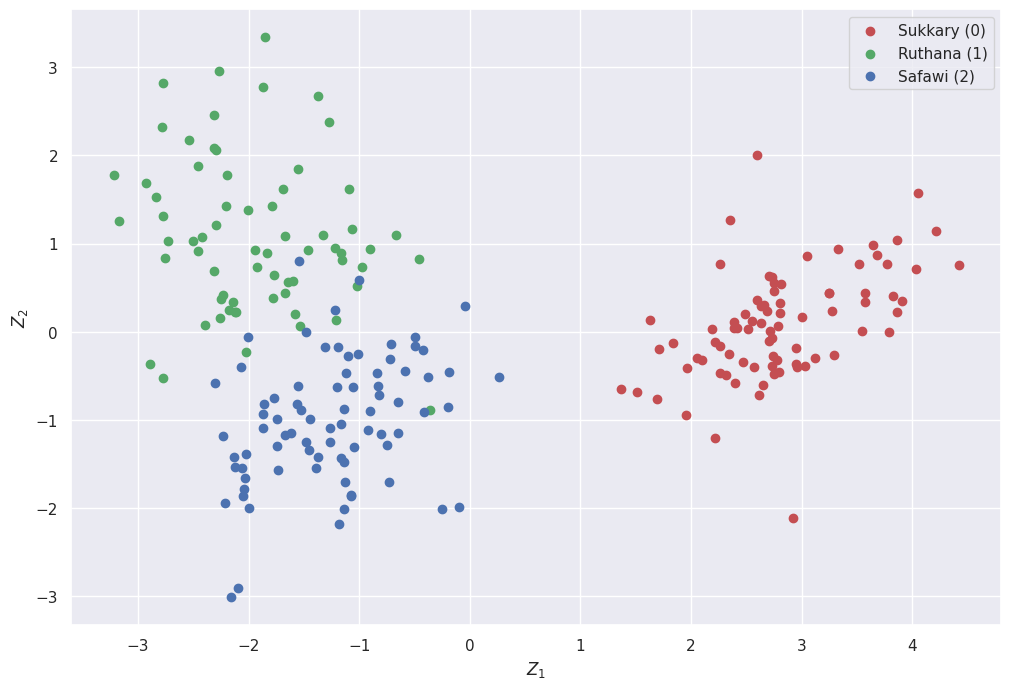

In [26]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)
print('Z:')
print(Z)

# Sukkary->0,  Ruthana->1, Safawi->2
idx_Sukkary = np.where(y == 0)
idx_Ruthana = np.where(y == 1)
idx_Safawi = np.where(y == 2)

plt. figure()
plt.scatter(Z[idx_Sukkary,0], Z[idx_Sukkary,1], c='r', label='Sukkary (0)')
plt.scatter(Z[idx_Ruthana,0], Z[idx_Ruthana,1], c='g', label='Ruthana (1)')
plt.scatter(Z[idx_Safawi,0], Z[idx_Safawi,1], c='b', label='Safawi (2)')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

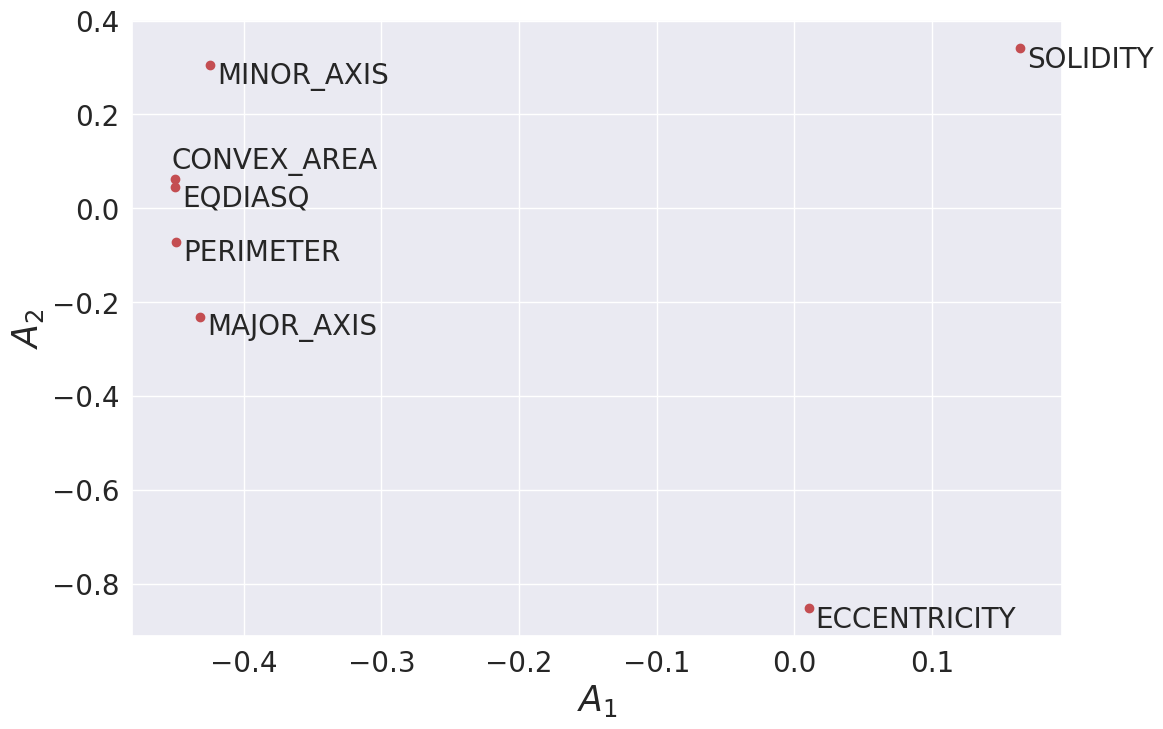

In [27]:
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)

A = pca.components_.T
print(f'Eigenvector matrix:\n{A}')

plt.figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('$A_1$', size=25)
plt.ylabel('$A_2$', size=25)
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
    if label == 'CONVEX_AREA':
        plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='left', va='bottom', size=20)
        continue
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='left', va='top', size=20)

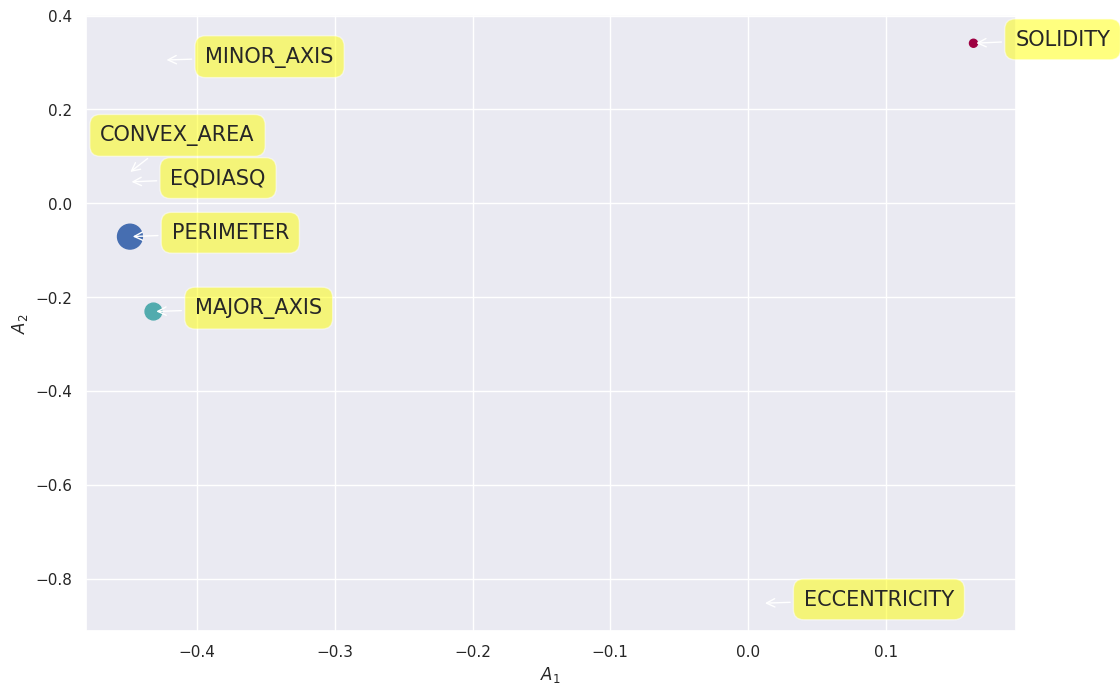

In [28]:
plt.figure()
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
    if label == 'CONVEX_AREA':
        plt.annotate(label,xy=(x, y), xytext=(-20, 20),
                     textcoords='offset points', ha='left', va='bottom', size=15,
                     bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                     arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
        continue
    plt.annotate(label,xy=(x, y), xytext=(30, 10),
      textcoords='offset points', ha='left', va='top', size=15,
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

Eigenvalues:
[4.90373775e+00 1.24955522e+00 8.54416986e-01 1.19316046e-02
 7.74841127e-03 3.55984454e-03 1.61293749e-04]


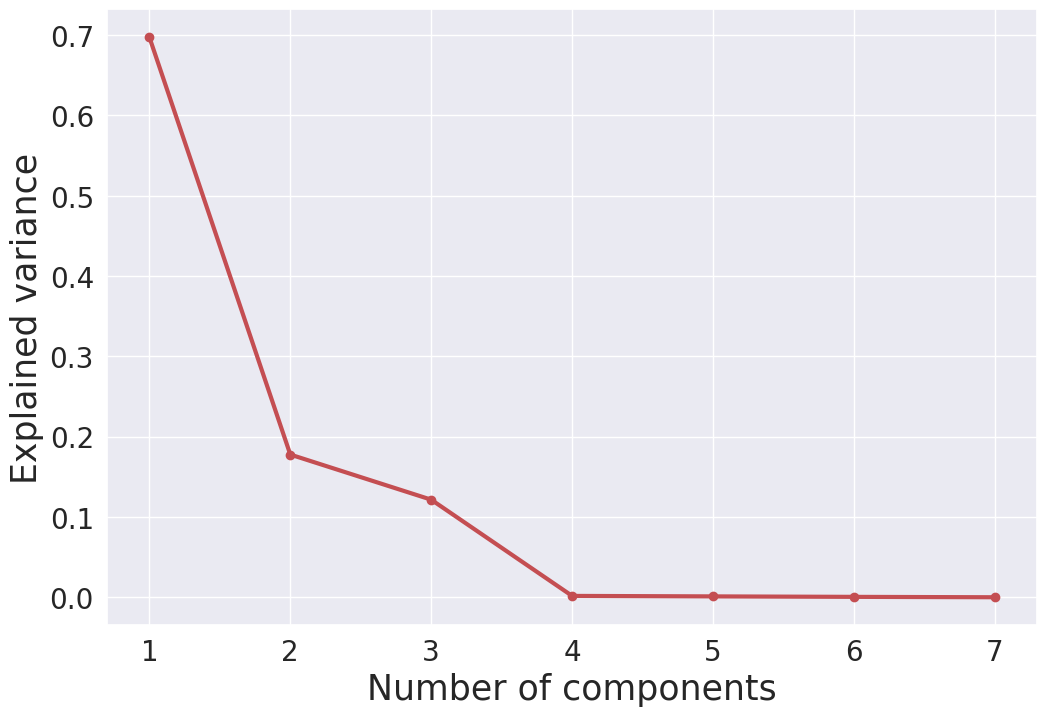

In [29]:
#Eigenvalues
Lambda = pca.explained_variance_
print(f'Eigenvalues:\n{Lambda}')

#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0, size=20)
plt.yticks(size=20)
plt.xlabel('Number of components', size=25)
plt.ylabel('Explained variance', size=25)
plt.show()

Text(0, 0.5, 'Cumulative explained variance')

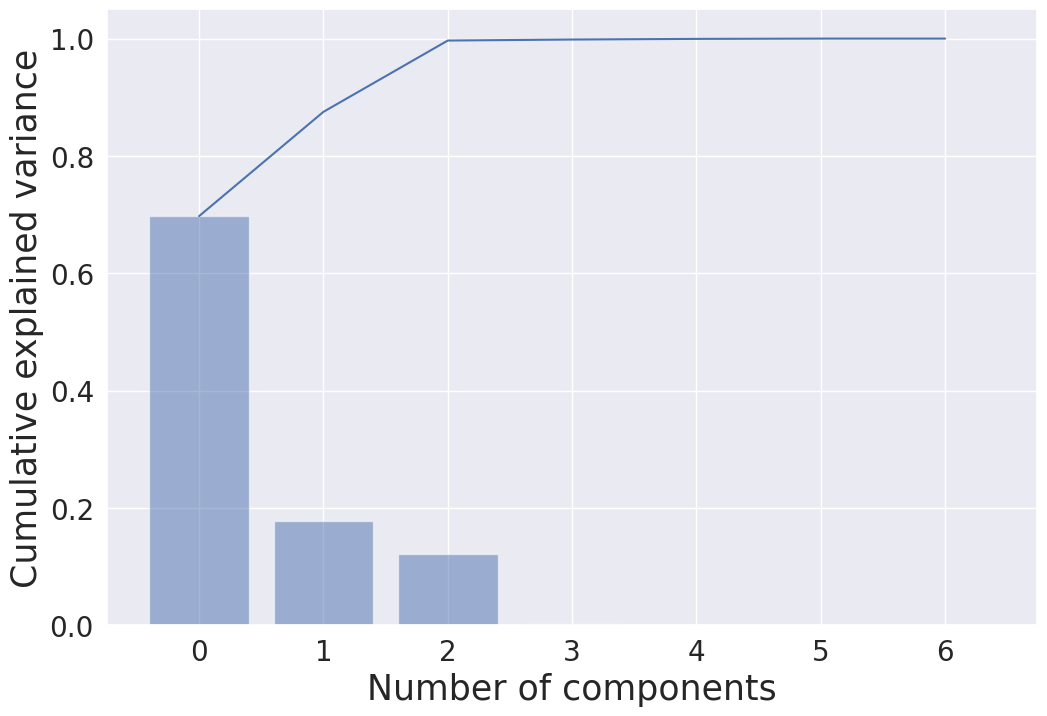

In [30]:
ell = pca.explained_variance_ratio_
plt.figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('Number of components', size=25)
plt.ylabel('Cumulative explained variance', size=25)

In [31]:
PC_variance = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
PC_variance

{'0': 'PC 1 (69.7%)',
 '1': 'PC 2 (17.8%)',
 '2': 'PC 3 (12.2%)',
 '3': 'PC 4 (0.2%)',
 '4': 'PC 5 (0.1%)',
 '5': 'PC 6 (0.1%)',
 '6': 'PC 7 (0.0%)'}

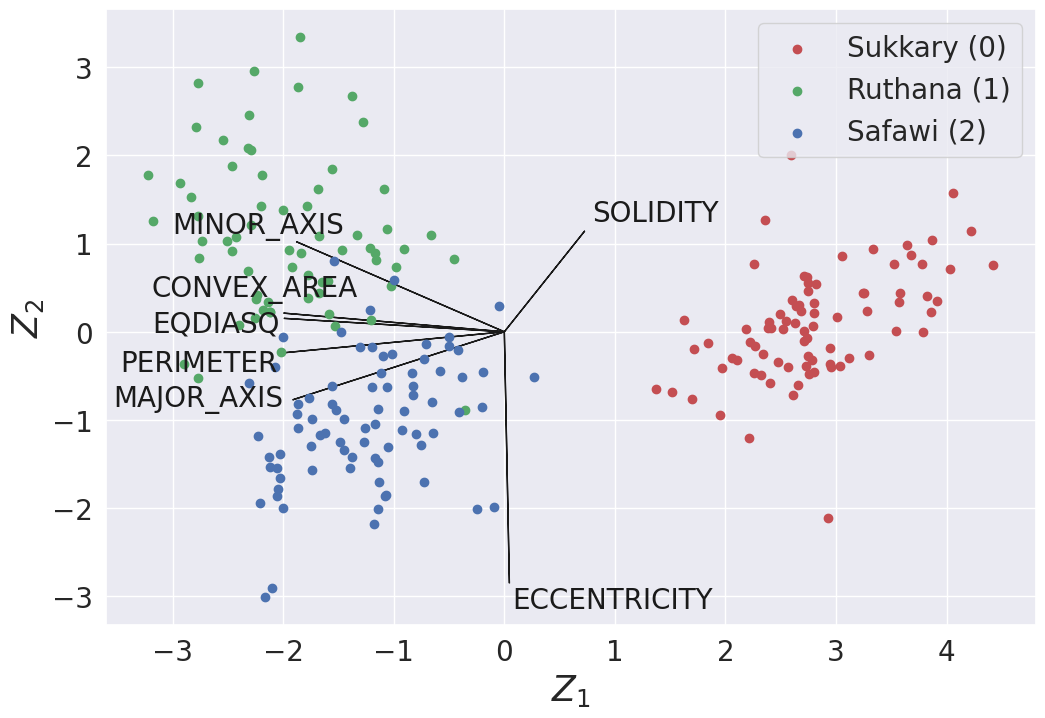

In [32]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt.figure()
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('$Z_1$', size=25)
plt.ylabel('$Z_2$', size=25)
for i in range(len(A1)):
    # arrows project features as vectors onto PC axes
    plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
    if variables[i] == 'CONVEX_AREA':
        plt.text(A1[i]*max(Z1)*1.6, A2[i]*max(Z2)*1.9, variables[i], color='k', size=20)
        continue
    elif variables[i] == 'EQDIASQ':
        plt.text(A1[i]*max(Z1)*1.6, A2[i]*max(Z2)*0., variables[i], color='k', size=20)
        continue
    elif variables[i] == 'PERIMETER':
        plt.text(A1[i]*max(Z1)*1.75, A2[i]*max(Z2)*1.9, variables[i], color='k', size=20)
        continue
    elif variables[i] == 'MAJOR_AXIS':
        plt.text(A1[i]*max(Z1)*1.85, A2[i]*max(Z2)*1.1, variables[i], color='k', size=20)
        continue
    elif variables[i] == 'SOLIDITY':
        plt.text(A1[i]*max(Z1)*1.1, A2[i]*max(Z2)*1.1, variables[i], color='k', size=20)
        continue

    plt.text(A1[i]*max(Z1)*1.6, A2[i]*max(Z2)*1.1, variables[i], color='k', size=20)

plt.scatter(Z[idx_Sukkary,0], Z[idx_Sukkary,1], c='r', label='Sukkary (0)')
plt.scatter(Z[idx_Ruthana,0], Z[idx_Ruthana,1], c='g', label='Ruthana (1)')
plt.scatter(Z[idx_Safawi,0], Z[idx_Safawi,1], c='b', label='Safawi (2)')
plt.legend(loc='upper right', fontsize=20)

In [37]:
!pip install pca

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 2.5 MB/s eta 0:00:00


In [33]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(df)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [34]:
print(out['topfeat'])

    PC       feature   loading  type
0  PC1   CONVEX_AREA -0.450276  best
1  PC2  ECCENTRICITY -0.852165  best
2  PC3      SOLIDITY -0.922679  best
3  PC1     PERIMETER -0.448875  weak
4  PC1    MAJOR_AXIS -0.431800  weak
5  PC1    MINOR_AXIS -0.424343  weak
6  PC1       EQDIASQ -0.449784  weak


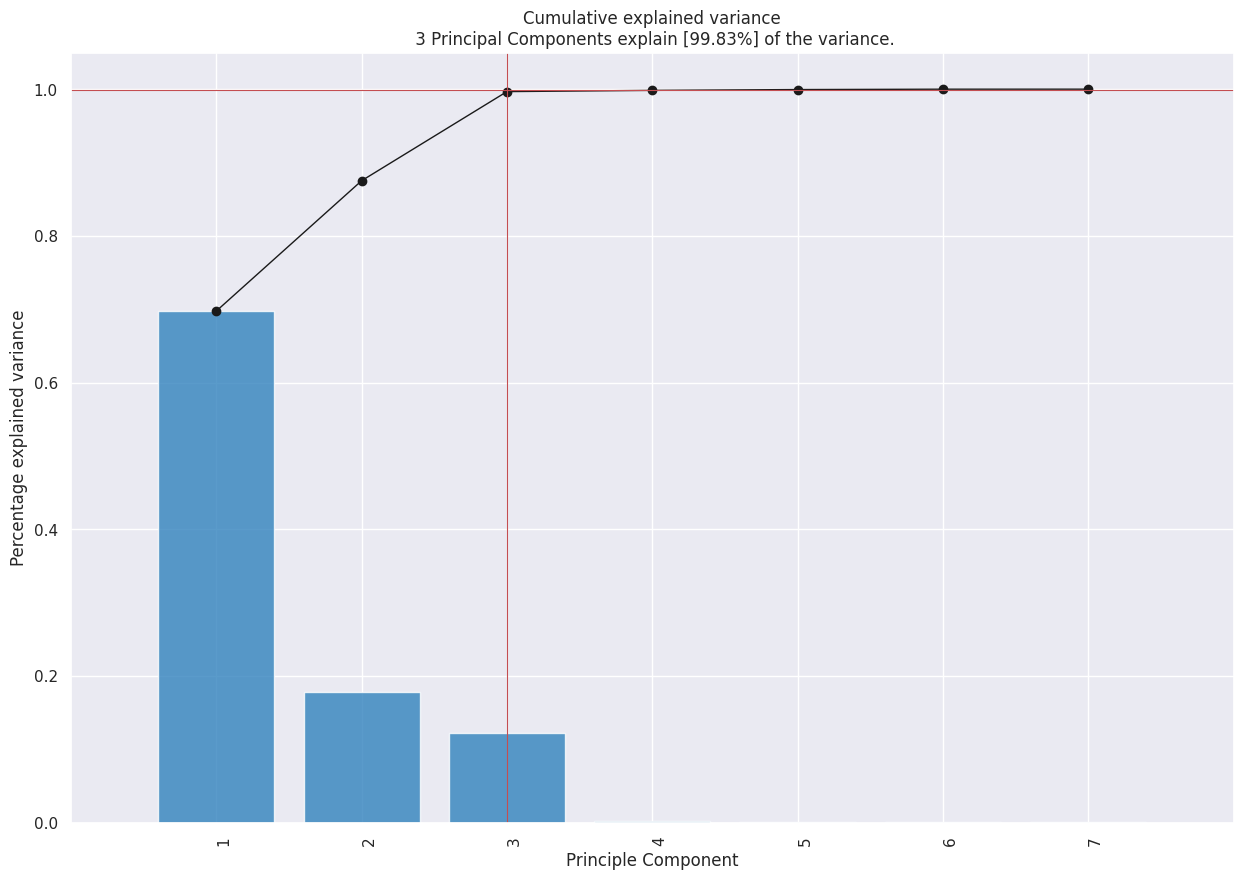

In [35]:
model.plot();

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


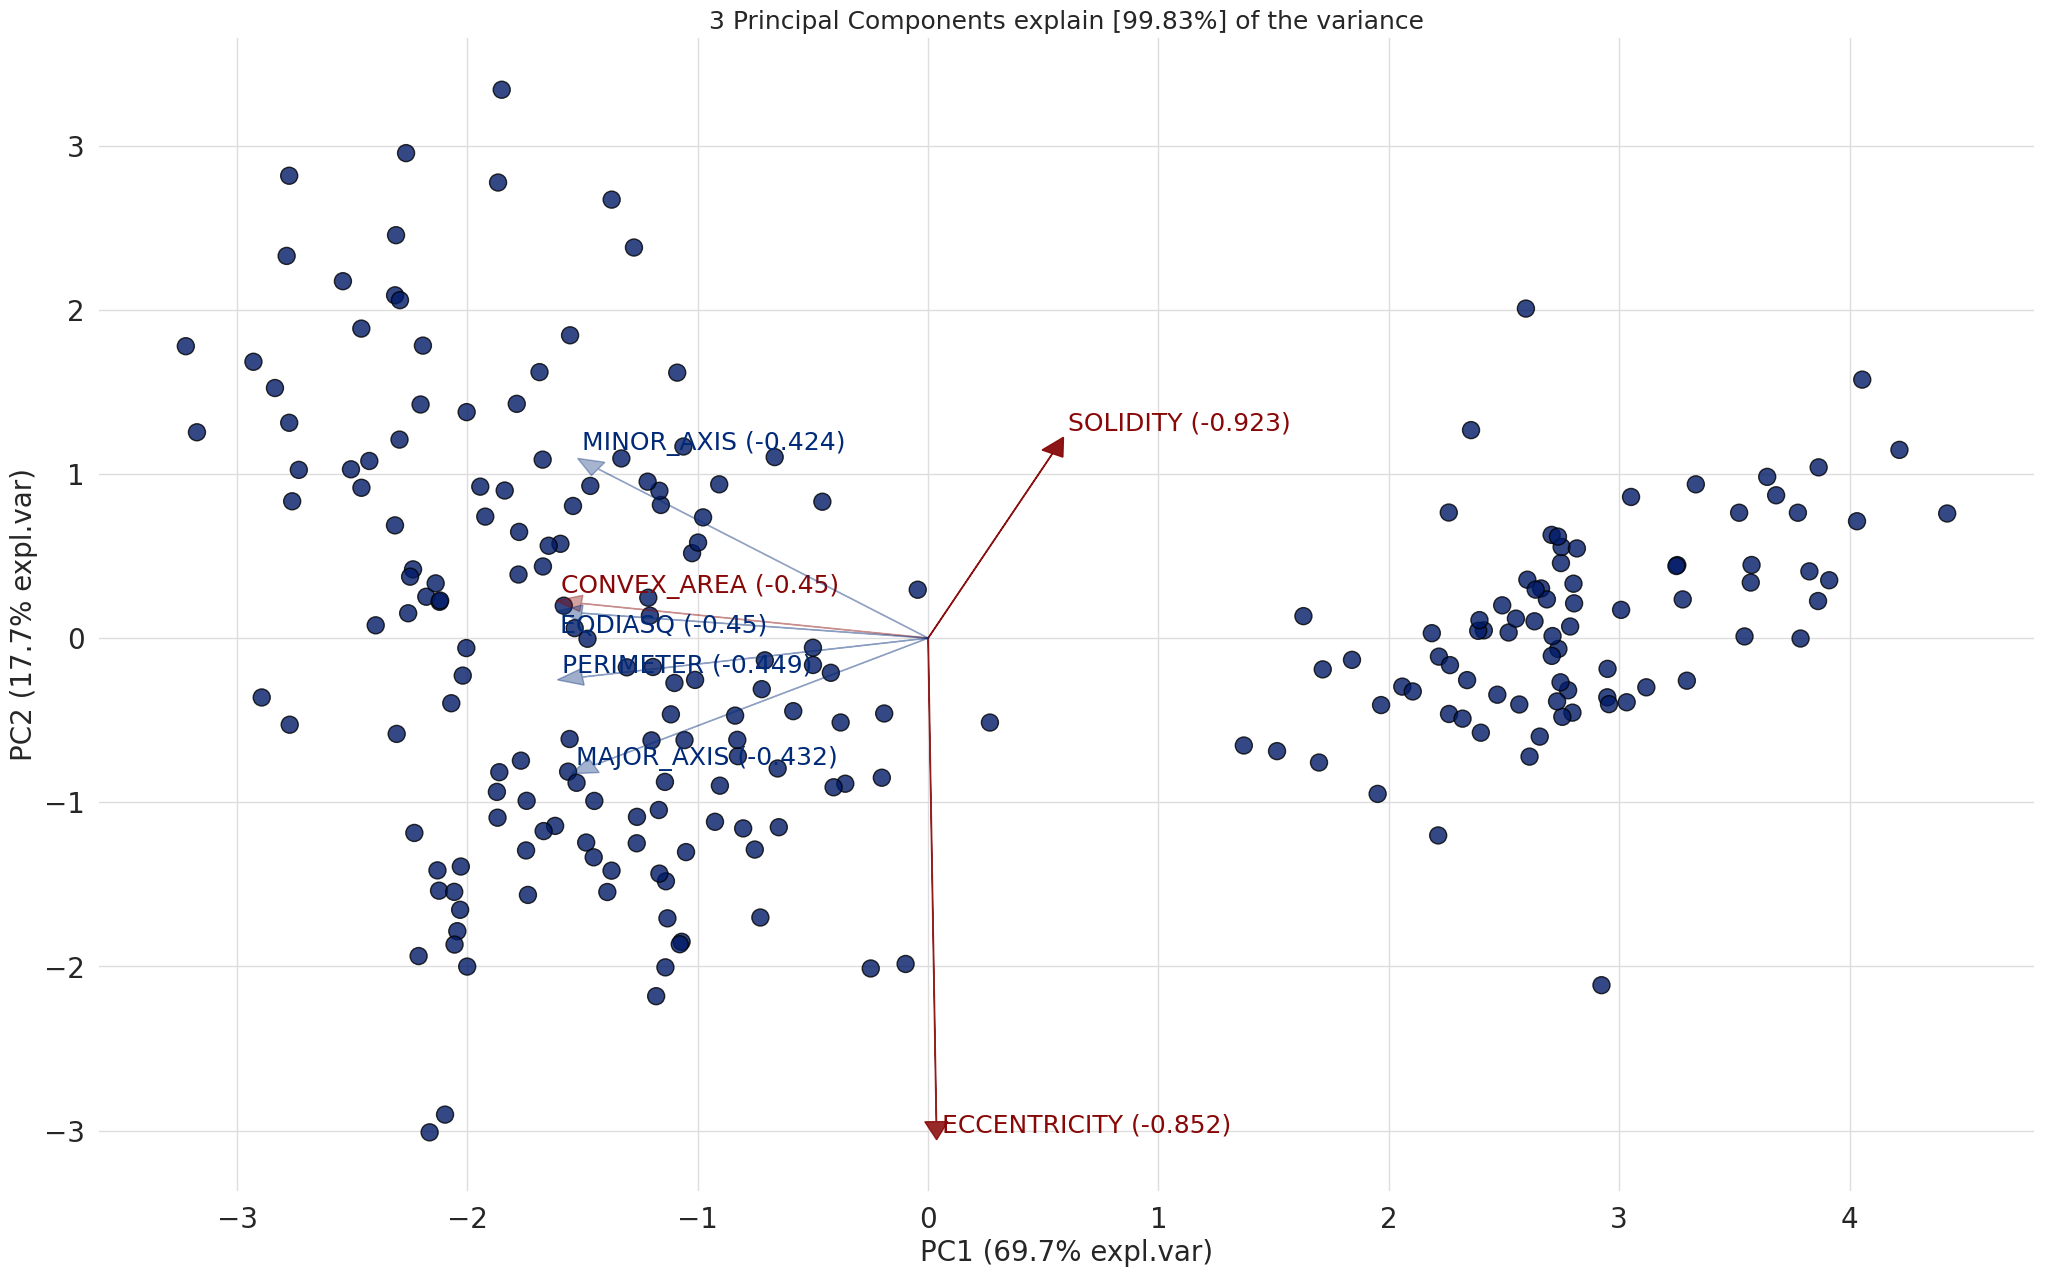

In [36]:
 ax = model.biplot(label=False, legend=False)

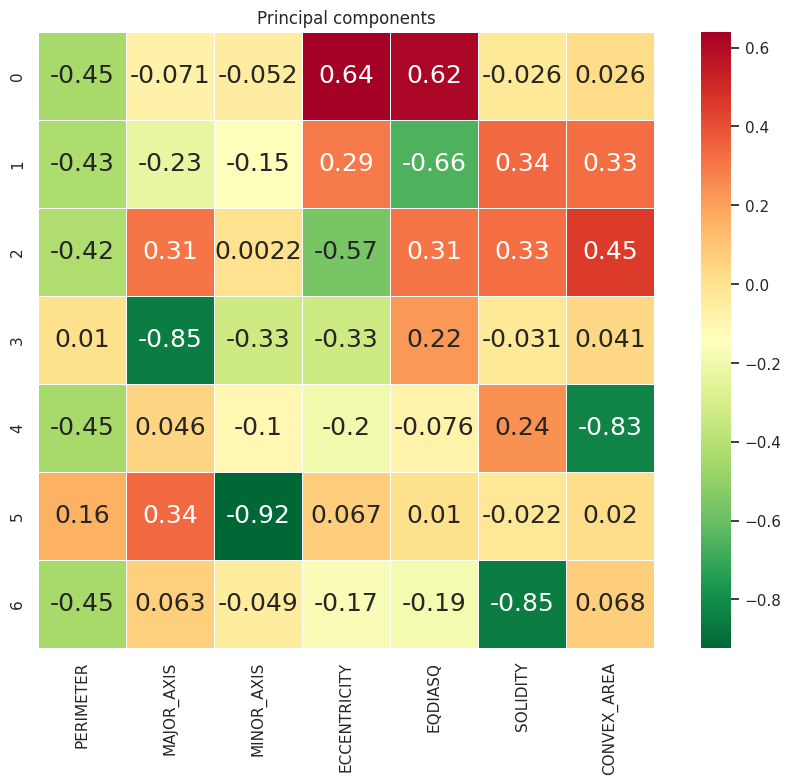

PC1:[-0.44887458 -0.43180028 -0.42434322  0.01031391 -0.44978396  0.16380617
 -0.45027604]
PC2:[-0.07095441 -0.23052062  0.30529127 -0.85216472  0.04551459  0.34113336
  0.06320364]


In [37]:
comps = pd.DataFrame(A, columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True,
            cbar=True, square=True)
# ax.tick_params(labelbottom=False,labeltop=True)
plt.xticks(rotation=90)
plt.title('Principal components')
plt.show()

print(f'PC1:{A1}')
print(f'PC2:{A2}')

In [38]:
y = datefruit['Class']
X = df.iloc[:,0:7]
X.describe().transpose()
X_st = StandardScaler().fit_transform(X)
df = pd.DataFrame(X_st)
df.columns = X.columns
df.describe().transpose()
observations = list(df.index)
variables = list(df.columns)

In [39]:
# Test-Train Split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=0)
print(f'Train Dataset Size: {X_train.shape[0]}')
print(f'Test Dataset Size: {X_test.shape[0]}')

Z_train, Z_test, zy_train, zy_test = train_test_split(Z, y, test_size=0.3, random_state=0)
Z12_train, Z12_test, z12y_train, z12y_test = train_test_split(Z[:,:2], y, test_size=0.3, random_state=0)

# Define the evaluation metric
scoring = ['f1_macro']

Train Dataset Size: 158
Test Dataset Size: 68


In [89]:
!pip install pycaret
!pip install shap

In [40]:
from pycaret.utils import version
version()

'3.2.0'

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [42]:
X = datefruit.drop(columns=['Class'])
X.head(10)

,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA
0,1427.5811,515.6693,354.6234,0.7260,427.2253,0.9865,145320
1,1671.4170,615.8516,403.3667,0.7557,497.3849,0.9870,196863
2,1503.5980,546.4366,361.8018,0.7494,443.1601,0.9883,156070
3,1463.5551,544.9724,361.5594,0.7482,443.4745,0.9944,155339
4,1403.3560,542.0650,326.1642,0.7987,419.5720,0.9935,139162
5,1467.7220,573.7374,333.2054,0.8141,436.7935,0.9918,151080
6,1569.0680,587.9650,367.5672,0.7805,464.0740,0.9923,170461
7,1530.7870,564.7152,362.0923,0.7674,451.0723,0.9920,161095
8,1487.1000,534.5702,393.8198,0.6762,457.7480,0.9923,165851
9,1426.8580,535.9053,345.1051,0.7651,429.6369,0.9922,146121


In [43]:
out['PC']

,PC1,PC2,PC3
0,2.747209,0.457003,0.237383
1,1.629218,0.133860,-0.121593
2,2.492142,0.199641,-0.030516
3,2.601344,0.355636,-0.383893
4,2.948341,-0.360712,-0.527666
...,...,...,...
221,-1.116769,-0.464467,0.032961
222,-0.410452,-0.908684,-0.305058
223,-1.737356,-1.564494,0.470328
224,-1.861684,-0.816859,-0.599223


[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '3 Principal Components explain [99.83%] of the variance'}, xlabel='PC1 (69.7% expl.var)', ylabel='PC2 (17.7% expl.var)'>)

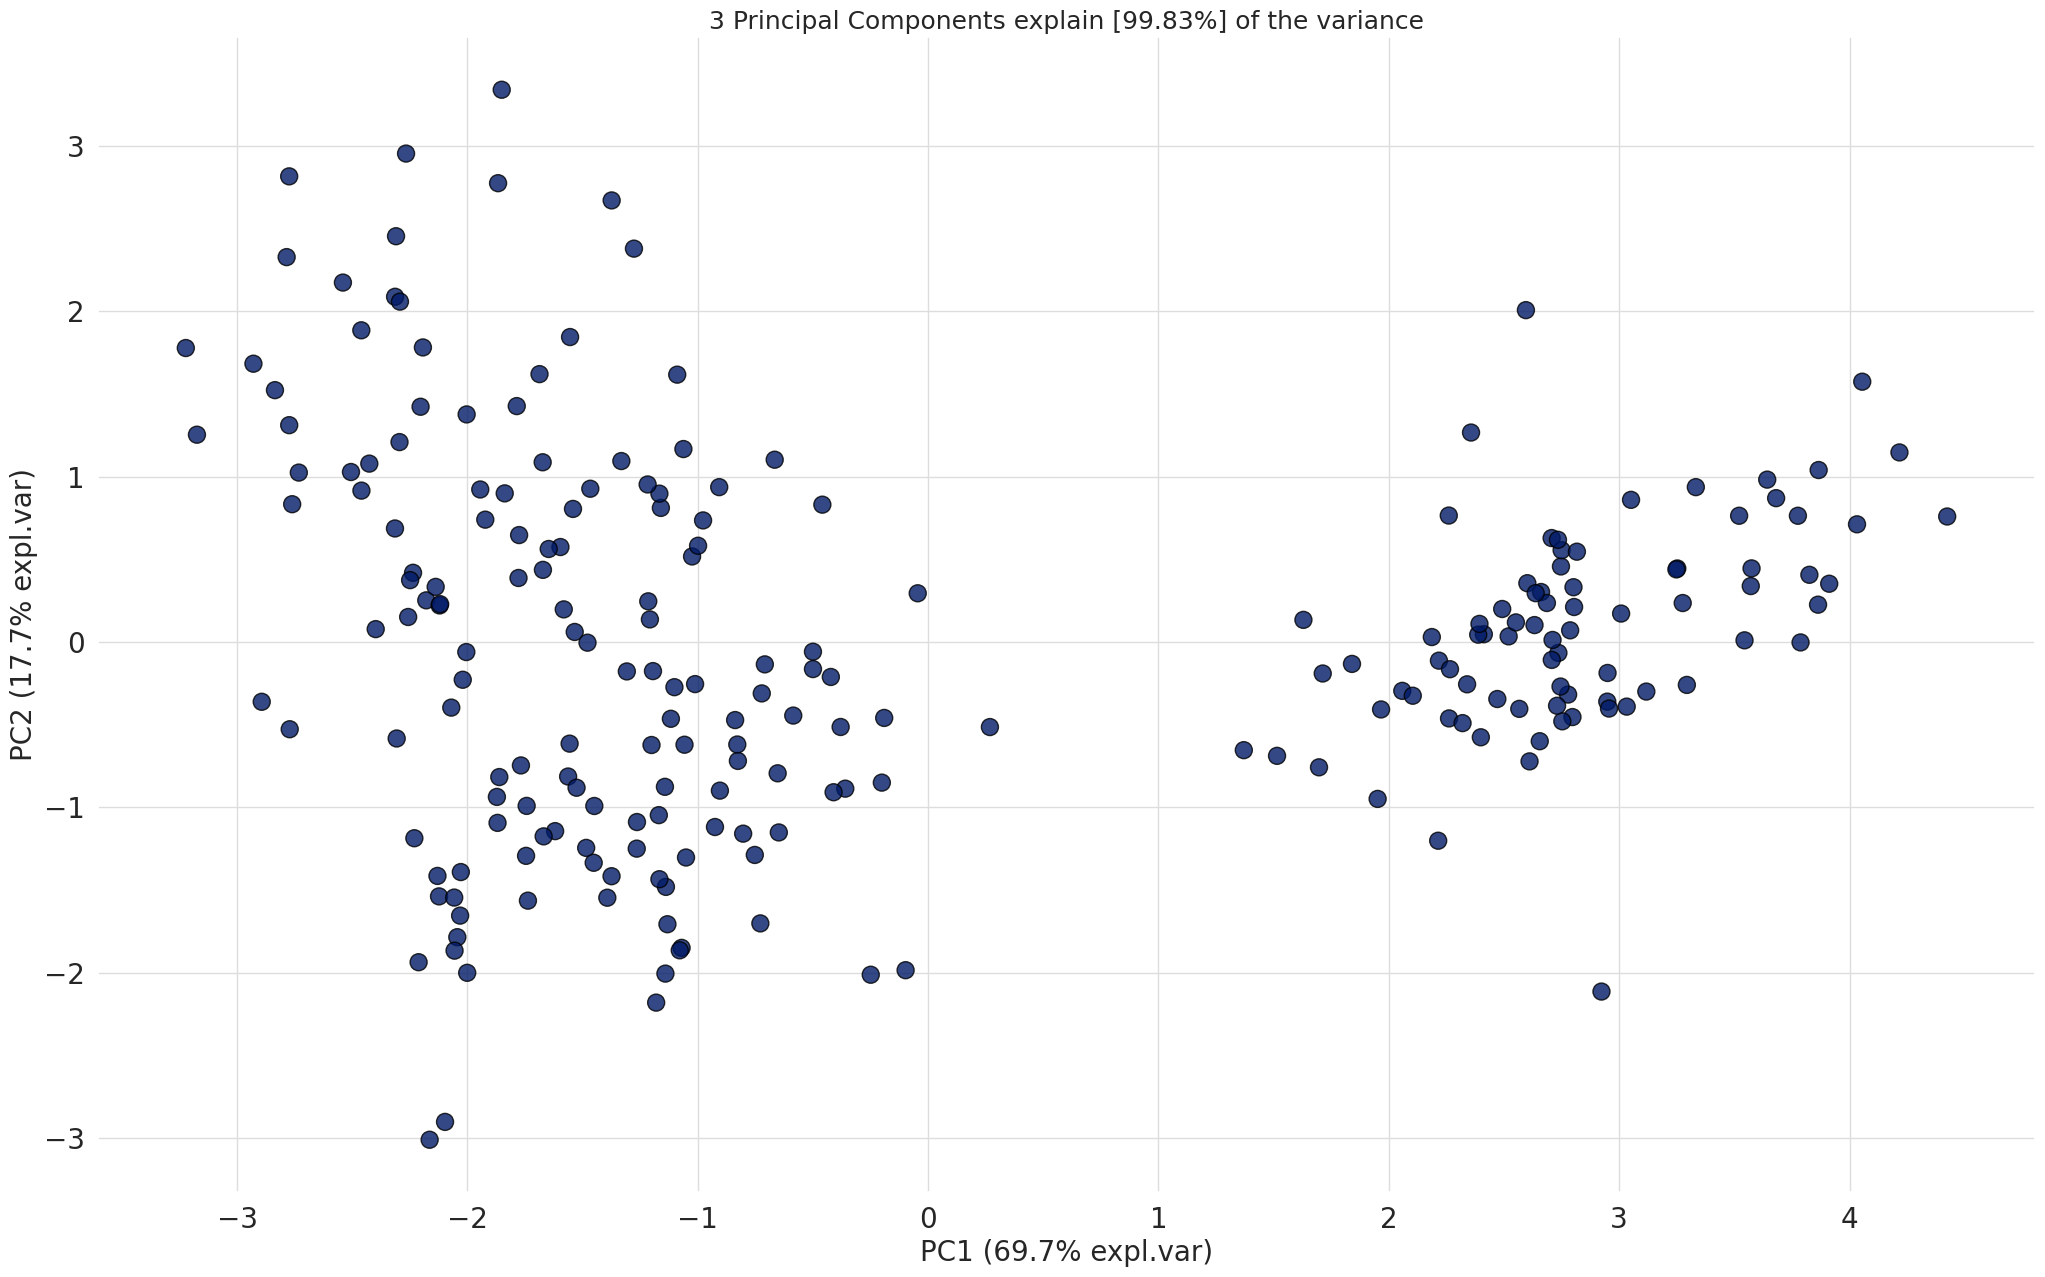

In [44]:
model.scatter(label=True, legend=False)

In [45]:
A = out['loadings'].T

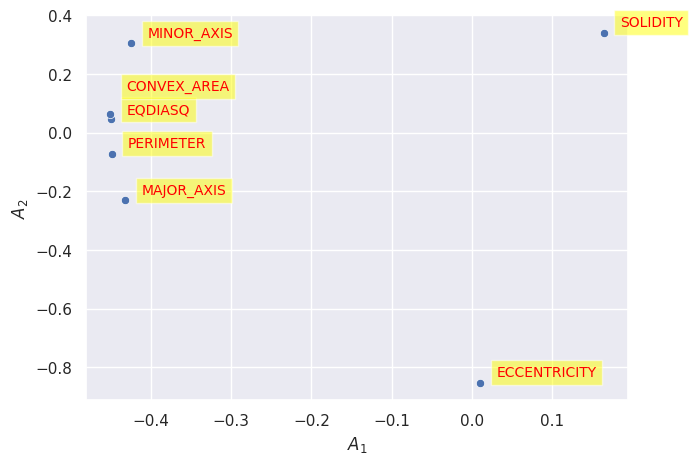

In [46]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
    if variables[i] == 'CONVEX_AREA':
        plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.08, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))
        continue
    plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

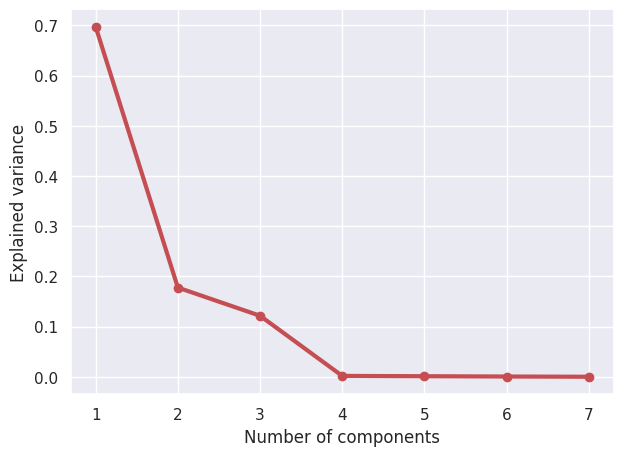

In [47]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

In [48]:
from pycaret.utils import version
version()

'3.2.0'

In [49]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (203, 7)
Unseen Data For Predictions: (23, 7)


In [50]:
from pycaret.classification import *
clf = setup(data=datefruit, target='Class', train_size=0.7, session_id=123)

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Multiclass
3,Original data shape,"(226, 8)"
4,Transformed data shape,"(226, 8)"
5,Transformed train set shape,"(158, 8)"
6,Transformed test set shape,"(68, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


In [51]:
 best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9808,0.9973,0.9808,0.9845,0.9809,0.9712,0.9729,0.3730
et,Extra Trees Classifier,0.9804,0.9987,0.9804,0.9817,0.9805,0.9703,0.9709,0.1210
dt,Decision Tree Classifier,0.9742,0.9812,0.9742,0.9765,0.9742,0.9609,0.9620,0.0190
ada,Ada Boost Classifier,0.9742,0.9867,0.9742,0.9765,0.9742,0.9609,0.9620,0.1370
gbc,Gradient Boosting Classifier,0.9742,0.9966,0.9742,0.9765,0.9742,0.9609,0.9620,0.2660
qda,Quadratic Discriminant Analysis,0.9738,0.9952,0.9738,0.9808,0.9739,0.9609,0.9642,0.0190
lda,Linear Discriminant Analysis,0.9738,1.0000,0.9738,0.9804,0.9736,0.9606,0.9640,0.0200
xgboost,Extreme Gradient Boosting,0.9738,0.9938,0.9738,0.9748,0.9732,0.9604,0.9614,0.0470
nb,Naive Bayes,0.9683,0.9900,0.9683,0.9745,0.9668,0.9514,0.9552,0.0220
rf,Random Forest Classifier,0.9679,0.9987,0.9679,0.9712,0.9679,0.9515,0.9531,0.1830


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [52]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9375,0.9583,0.9375,0.9500,0.9381,0.9059,0.9113
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9375,0.9545,0.9375,0.9479,0.9369,0.9059,0.9113
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [54]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')

In [55]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9375,0.9771,0.9375,0.9500,0.9381,0.9059,0.9113
2,0.9375,0.9716,0.9375,0.9479,0.9369,0.9059,0.9113
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9333,0.9731,0.9333,0.9467,0.9340,0.9000,0.9061


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [56]:
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')

In [57]:
!pip install statsmodels --upgrade

In [58]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [59]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7500,0.9312,0.7500,0.6000,0.6562,0.6000,0.6761
1,0.6875,0.8797,0.6875,0.6726,0.6772,0.5181,0.5213
2,0.8750,0.9659,0.8750,0.8750,0.8750,0.8118,0.8118
3,0.9375,0.9716,0.9375,0.9479,0.9369,0.9059,0.9113
4,0.8750,0.9886,0.8750,0.9107,0.8698,0.8118,0.8316
5,0.8750,0.9659,0.8750,0.8750,0.8750,0.8118,0.8118
6,0.7500,0.8864,0.7500,0.8611,0.7024,0.6235,0.6921
7,0.8125,0.9344,0.8125,0.8147,0.8093,0.7160,0.7203
8,0.8000,0.9461,0.8000,0.8133,0.8020,0.7000,0.7047


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [60]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7500,0.8969,0.7500,0.6000,0.6562,0.6000,0.6761
1,0.7500,0.8510,0.7500,0.7344,0.7262,0.6098,0.6258
2,0.8750,0.9773,0.8750,0.8750,0.8750,0.8118,0.8118
3,0.9375,1.0000,0.9375,0.9479,0.9369,0.9059,0.9113
4,0.8750,1.0000,0.8750,0.9107,0.8698,0.8118,0.8316
5,0.9375,0.9716,0.9375,0.9479,0.9369,0.9059,0.9113
6,0.8125,0.9261,0.8125,0.8828,0.7940,0.7176,0.7590
7,0.8750,0.9821,0.8750,0.9062,0.8683,0.8095,0.8298
8,0.8667,0.9461,0.8667,0.8667,0.8667,0.7973,0.7973


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [62]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [63]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9375,1.0000,0.9375,0.9500,0.9381,0.9059,0.9113
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9375,1.0000,0.9375,0.9479,0.9369,0.9059,0.9113
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [64]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9375,1.0000,0.9375,0.9500,0.9381,0.9059,0.9113
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [65]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [66]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9375,1.0000,0.9375,0.9500,0.9381,0.9059,0.9113
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9375,1.0000,0.9375,0.9479,0.9369,0.9059,0.9113
6,0.9375,1.0000,0.9375,0.9479,0.9369,0.9059,0.9113
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [67]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9375,0.9885,0.9375,0.9500,0.9381,0.9059,0.9113
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9375,1.0000,0.9375,0.9479,0.9369,0.9059,0.9113
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [68]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [69]:
tuned_best_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9375,1.0000,0.9375,0.9500,0.9381,0.9059,0.9113
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [70]:
tuned_best_model

LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…